<a href="https://colab.research.google.com/github/arinaLozhkina/ml_mipt_dafe_major/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22hw_0_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание № 0


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter 
%matplotlib inline

### Самостоятельное написание дерева решений
Источник: [mlcourse.ai](https://mlcourse.ai) от [Юрия Кашницкого](https://yorko.github.io) и [OpenDataScience](https://ods.ai)

Рассмотрим следующую одномерную задачу восстановления регрессии. Неформально, нужно построить функцию $a(x)$, приближающую искомую зависимость $y = f(x)$ в терминах среднеквадратичной ошибки: $min \sum_i {(a(x_i) - f(x_i))}^2$. 

Проделаем несколько шагов в построении дерева решений. Исходя из соображений симметрии, выберем пороги для разбиения равными соответственно 0, 1.5 и -1.5. Напомним, что в случае задачи восстановления регрессии листовая вершина выдает среднее значение ответа по всем объектам обучающей выборки, попавшим в эту вершину.

Итак, начнём. Дерево глубины 0 состоит из одного корня, который содержит всю обучающую выборку. Как будут выглядеть предсказания данного дерева для $x \in [-2, 2]$? Постройте соответствующий график.

Text(0, 0.5, '$y$')

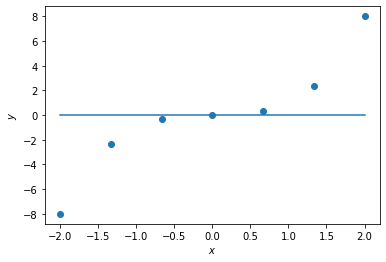

In [ ]:
# Ваш Код здесь
X = np.linspace(-2, 2, 7)
y = X ** 3

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.plot(np.linspace(-2,2,50), np.linspace(np.mean(y),np.mean(y),50))
plt.ylabel(r'$y$')

Произведем первое разбиение выборки по предикату $[x < 0]$. Получим дерево глубины 1 с двумя листьями. Постройте аналогичный график предсказаний для этого дерева.

In [ ]:
def regression_tree(x, y, X, num):
    l_less = len(y[x < num])
    l_more = len(y[x >= num])
    # Другой критерий: https://habr.com/ru/company/ods/blog/322534/#kak-stroitsya-derevo-resheniy
    res_less = [sum((y[x < num] - (sum(y[x < num]) / l_less)) ** 2 ) / l_less] * (X < num) 
    res_more =  [sum((y[x >= num] - (sum(y[x >= num]) / l_more)) ** 2 ) / l_more] * (X >= num)
    return res_less + res_more

Text(0, 0.5, '$y$')

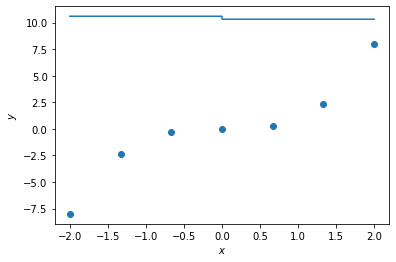

In [ ]:
# Ваш Код здесь
x = np.linspace(-2, 2, 7)
X = np.linspace(-2, 2, 20000)
y = x ** 3

res_y = regression_tree(x, y, X, 0)

plt.plot(X, res_y)
plt.scatter(x, y)

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

В алгоритме построения дерева решений признак и значение порога, по которым происходит разбиение выборки, выбираются исходя из некоторого критерия. Для регрессии обычно используется дисперсионный критерий: $$Q(X, j, t) = D(X) - \dfrac{|X_l|}{|X|} D(X_l) - \dfrac{|X_r|}{|X|} D(X_r),$$ где $X$ – выборка, находящаяся в текущей вершине, $X_l$ и $X_r$ – разбиение выборки $X$ на две части по предикату $[xj < t]$ (то есть по $j$-ому признаку и порогу $t$), а $D(X)$ – дисперсия ответов на выборке $X$: $$D(X) = \dfrac{1}{|X|} \sum{x_j \in X}(yj – \dfrac{1}{|X|}\sum{x_i \in X}y_i)^2,$$ где $y_i = y(x_i)$ – ответ на объекте $x_i$. При каждом разбиении вершины выбираются признак $j$ и значение порога $t$, максимизирующие значение функционала $Q(X, j, t)$.

В нашем случае признак всего один, поэтому $Q$ зависит только от значения порога $t$ (и ответов выборки в данной вершине).

Постройте график функции $Q(X, t)$ в корне в зависимости от значения порога $t$ на отрезке $[-1.9, 1.9]$.

In [ ]:
 # мера прироста информации 

# def ig(ind, data): 
#   # input: ind - индекс разбиения
#   s_0 = enthropy(probabilities(data))
#   s_1 = enthropy(probabilities(data[:ind + 1]))
#   s_2 = enthropy(probabilities(data[ind + 1:]))
#   res = s_0 - s_1 * (ind + 1) / len(data) - s_2 * (len(data) - ind - 1) / len(data)
#   return res, s_0, s_1, s_2

In [ ]:
def Q(x, y, t):  # Дисперсионный критерий 
    return sum((y - sum(y)/len(y))**2)/len(y)-len(y[x < t])/len(y)* sum(((y[x < t]) - sum((y[x < t]))/len((y[x < t])))**2)/len((y[x < t])) - len(y[x >= t])/len(y)*sum((y[x >= t]-sum(y[x >= t])/len(y[x >= t]))**2)/len(y[x >= t]) 

-1.3332016600830041


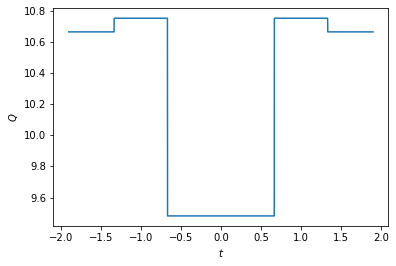

In [ ]:
x = np.linspace(-2, 2, 7)
y = x ** 3

all_t = np.linspace(-1.9, 1.9, 20000)
all_Q = [Q(x, y, t) for t in all_t]

plt.plot(all_t, all_Q)    
plt.xlabel(r'$t$')
plt.ylabel(r'$Q$')

param = all_t[np.argmax(all_Q)]
print(param)

А теперь на основе значений полученной функции постройте дерево глубины 1.

Text(0, 0.5, '$y$')

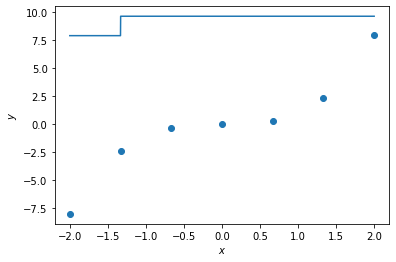

In [ ]:
# Ваш Код здесь
x = np.linspace(-2, 2, 7)
X = np.linspace(-2, 2, 2000)
y = x ** 3

res_y = regression_tree(x, y, X, param)

plt.plot(X, res_y)
plt.scatter(x, y)

plt.xlabel(r'$x$')
plt.ylabel(r'$y$')